# Inspect RNA data (GFP+, new)
- QC already done by Xin and others

## Set up correct conda environment


In [1]:
.libPaths()

[1] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

In [2]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

## Load packages

In [3]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



Attaching shinyBS

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following ob

In [4]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/users/xjluo/miniconda3/envs/jupyter_env/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1                     ggpointdensity_0.1.0              
 [3] BSgenome.Mmusculus.UCSC.mm10_1.4.3 BSgenome_1.68.0                   
 [5] rtracklayer_1.60.1                 Bi

## Paths

In [5]:
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/RNA'

data_master_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/RNA"

## Step 1: Load Object

In [7]:
rna_gfp_obj_path <- paste0(data_master_dir, '/', 'ctx.Robj')
rna_gfp_obj_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/RNA/ctx.Robj"

In [8]:
load(rna_gfp_obj_path)

# https://satijalab.org/seurat/reference/readmtx

In [9]:
# check version
# https://rdrr.io/github/mojaveazure/seurat-object/man/Version.html
Version(ctx)

[1] '5.0.1'

In [10]:
Assays(ctx)

[1] "RNA"                                   
[2] "ADT"                                   
[3] "prediction.score.class"                
[4] "prediction.score.cluster"              
[5] "prediction.score.subclass"             
[6] "prediction.score.cross_species_cluster"

In [11]:
GetAssayData(object = ctx, assay = "RNA", slot = "counts")

  [[ suppressing 32 column names 'all_all_AAACCCAAGGCGTCCT-1', 'all_all_AAACCCACAAATGCGG-1', 'all_all_AAACGAAAGAAATGGG-1' ... ]]

  [[ suppressing 32 column names 'all_all_AAACCCAAGGCGTCCT-1', 'all_all_AAACCCACAAATGCGG-1', 'all_all_AAACGAAAGAAATGGG-1' ... ]]

  [[ suppressing 32 column names 'all_all_AAACCCAAGGCGTCCT-1', 'all_all_AAACCCACAAATGCGG-1', 'all_all_AAACGAAAGAAATGGG-1' ... ]]



32285 x 7158 sparse Matrix of class "dgCMatrix"
                                                                                             
Xkr4          10  7  5 33  . 11  .  31 17  8  9  8 11  5  .  1  . 19   .  9  7 13  .  7  6  6
Gm1992         .  .  .  .  .  .  .   3  .  .  1  1  1  .  .  .  .  .   .  .  .  4  .  1  .  .
Gm19938        1  1  .  .  .  .  .   1  2  .  1  .  .  1  .  .  .  1   .  1  2  2  .  .  .  .
Gm37381        .  .  .  .  .  .  .   .  .  .  .  .  .  .  .  .  .  .   .  .  .  .  .  .  .  .
Rp1            .  .  .  .  1  .  .   .  .  .  .  .  .  .  2  .  .  .   .  .  .  .  .  .  .  .
Sox17          .  .  .  .  .  .  .   .  .  .  .  .  .  .  .  .  .  .   .  .  .  .  .  .  .  .
Gm37587        .  .  .  .  .  .  .   .  .  .  .  .  .  .  .  .  .  .   .  .  .  .  .  .  .  .
Gm37323        .  .  .  .  .  .  .   .  .  .  .  .  .  .  .  .  .  .   .  .  .  .  .  .  .  .
Mrpl15         1  .  1  .  1  2  .   1  .  .  .  1  1  1  1  1  .  1   1  3  1  1  .  2  .  1
Lypla1      

In [12]:
GetAssayData(object = ctx, assay = "RNA", slot = "data")

  [[ suppressing 32 column names 'all_all_AAACCCAAGGCGTCCT-1', 'all_all_AAACCCACAAATGCGG-1', 'all_all_AAACGAAAGAAATGGG-1' ... ]]

  [[ suppressing 32 column names 'all_all_AAACCCAAGGCGTCCT-1', 'all_all_AAACCCACAAATGCGG-1', 'all_all_AAACGAAAGAAATGGG-1' ... ]]

  [[ suppressing 32 column names 'all_all_AAACCCAAGGCGTCCT-1', 'all_all_AAACCCACAAATGCGG-1', 'all_all_AAACGAAAGAAATGGG-1' ... ]]



32285 x 7158 sparse Matrix of class "dgCMatrix"
                                                                                  
Xkr4          1.8731446 2.0514284 1.7175390 2.7058526 .         2.2795140 .       
Gm1992        .         .         .         .         .         .         .       
Gm19938       0.4388181 0.6772359 .         .         .         .         .       
Gm37381       .         .         .         .         .         .         .       
Rp1           .         .         .         .         0.8709899 .         .       
Sox17         .         .         .         .         .         .         .       
Gm37587       .         .         .         .         .         .         .       
Gm37323       .         .         .         .         .         .         .       
Mrpl15        0.4388181 .         0.6492791 .         0.8709899 0.9535466 .       
Lypla1        .         .         .         .         .         .         .       
Tcea1         0.4388181 0.6772359 .    

In [13]:
dim(GetAssayData(object = ctx, assay = "ADT", slot = "counts"))

[1]    2 7158

In [14]:
Reductions(ctx)

[1] "integrated_dr"     "ref.umap"          "pca"              
[4] "umap.unintegrated" "umap"

In [15]:
annotated.meta.data <- ctx@meta.data
head(annotated.meta.data)
print(colnames(annotated.meta.data))
dim(annotated.meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_ADT,nFeature_ADT,predicted.class.score,predicted.class,predicted.cluster.score,predicted.cluster,predicted.subclass.score,predicted.subclass,predicted.cross_species_cluster.score,predicted.cross_species_cluster,mapping.score,unintegrated_clusters,seurat_clusters,celltype240423
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>
all_all_AAACCCAAGGCGTCCT-1,all,18153,5343,0.4682422,0,0,1.0000000,GABAergic,0.6613585,Meis2,0.7100394,Meis2,0.7100394,exclude,0.7668389,8,8,IN Lamp5/Lhx6
all_all_AAACCCACAAATGCGG-1,all,10326,3617,2.0821228,1,1,0.9776917,Glutamatergic,0.3793864,L6 IT_2,0.7297331,L6 IT,0.3793864,L6 IT_2,0.3950286,1,1,L2/3/5 IT
all_all_AAACGAAAGAAATGGG-1,all,10939,3947,2.9435963,0,0,1.0000000,Glutamatergic,0.3266533,L6 IT_1,0.5897381,L6 IT,0.3266533,L6 IT_1,0.4633292,1,1,L2/3/5 IT
all_all_AAACGAAAGGAATTAC-1,all,23627,5940,2.6918356,0,0,1.0000000,GABAergic,0.3959870,Sst Hpse,1.0000000,Sst,0.6263483,Sst_3,0.9703562,8,8,IN Lamp5/Lhx6
all_all_AAACGAACAGCCGGTT-1,all,7198,3383,1.5837733,0,0,1.0000000,Non-Neuronal,0.9015678,Astro Aqp4_Slc7a10,1.0000000,Astro,0.9015678,Astro_2,0.9469007,9,9,Astro_Aqp4
all_all_AAACGAAGTCGTCATA-1,all,12540,4226,2.2328549,0,0,0.9927998,Glutamatergic,0.7788026,L5 IT Rspo1_1,0.7973850,L5 IT,0.7916772,L5 IT_1,0.7241013,1,1,L2/3/5 IT


 [1] "orig.ident"                           
 [2] "nCount_RNA"                           
 [3] "nFeature_RNA"                         
 [4] "percent.mt"                           
 [5] "nCount_ADT"                           
 [6] "nFeature_ADT"                         
 [7] "predicted.class.score"                
 [8] "predicted.class"                      
 [9] "predicted.cluster.score"              
[10] "predicted.cluster"                    
[11] "predicted.subclass.score"             
[12] "predicted.subclass"                   
[13] "predicted.cross_species_cluster.score"
[14] "predicted.cross_species_cluster"      
[15] "mapping.score"                        
[16] "unintegrated_clusters"                
[17] "seurat_clusters"                      
[18] "celltype240423"                       


[1] 7158   18

In [16]:
table(annotated.meta.data$orig.ident)


 all GFP2 
3045 4113 

In [17]:
table(annotated.meta.data$celltype240423)


       Astro_Aqp4       Astro_Top2a     IN Lamp5/Lhx6         L2/3/5 IT 
              465               336               320              1175 
       L6 CT_Cpa6           L6 IT_1           L6 IT_2 Migrating neurons 
             1628              1476              1245               347 
       OPC_Pdgfra 
              166 

## Step 2: visualize
- preprocessing/clustering skipped since the object has already been processed and annotated

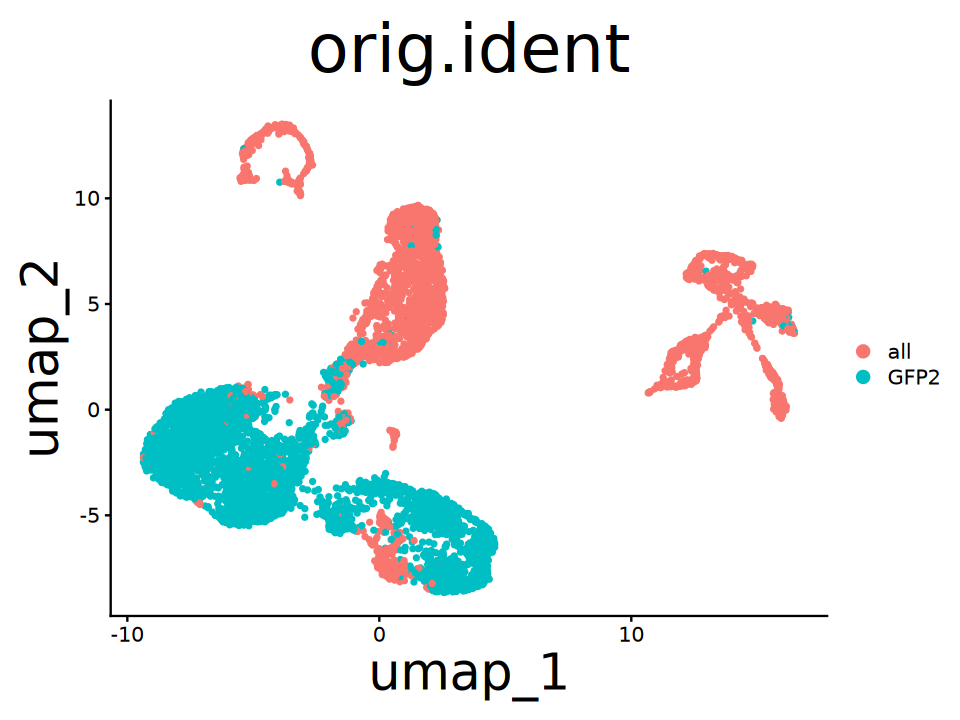

In [18]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(ctx, shuffle=TRUE, label = TRUE, repel = TRUE, pt.size=1, label.size=0, reduction = "umap", group.by = 'orig.ident', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     


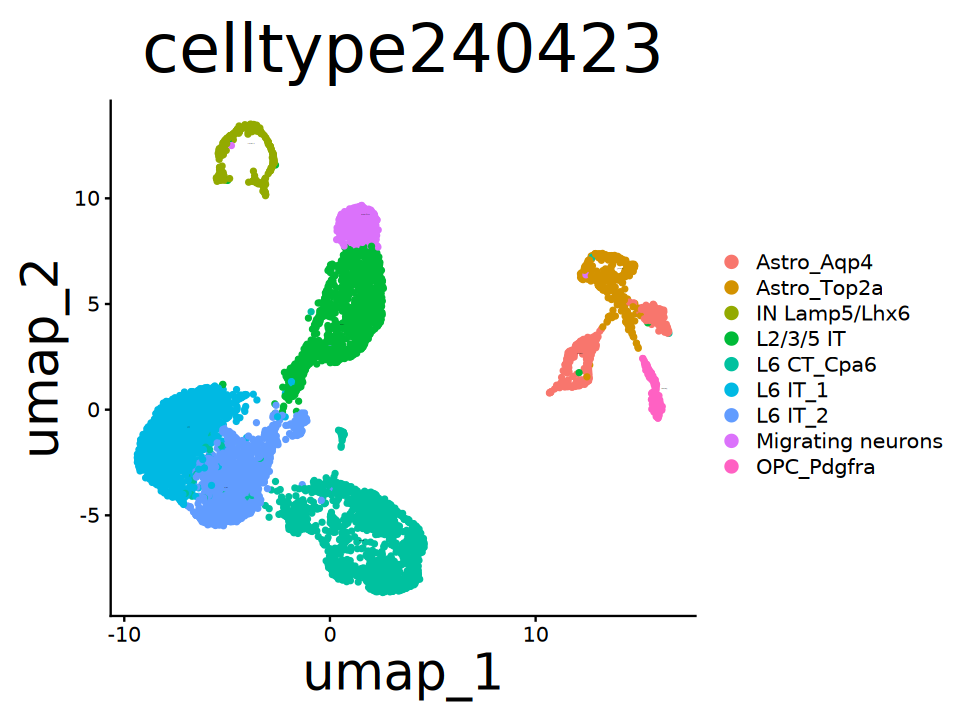

In [19]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(ctx, shuffle=TRUE, label = TRUE, repel = TRUE, pt.size=1, label.size=0, reduction = "umap", group.by = 'celltype240423', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     


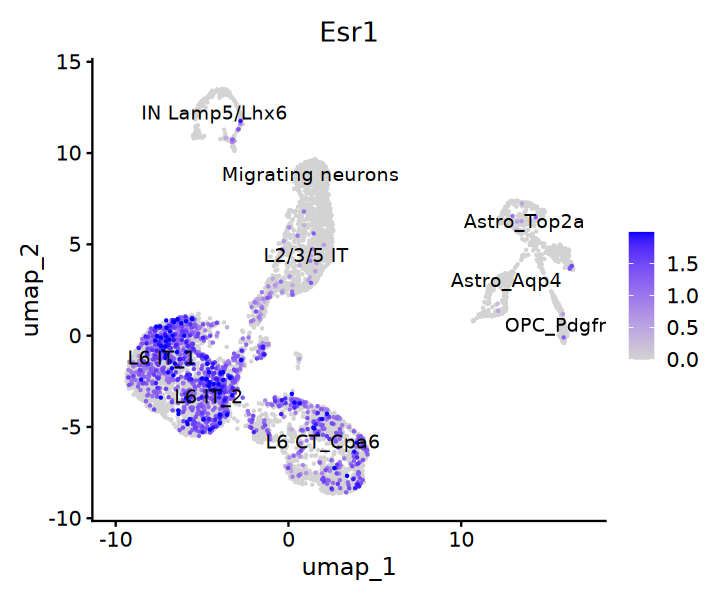

In [20]:
options(repr.plot.width=6, repr.plot.height=5)
DefaultAssay(ctx) <- "RNA"

FeaturePlot(
  object = ctx,
  features = c("Esr1"),
  pt.size = 0.2,
  label.size = 4,
  max.cutoff = 'q95',
  ncol = 1,
  reduction = "umap",
  label = TRUE,
  raster = FALSE,
  order = TRUE
)

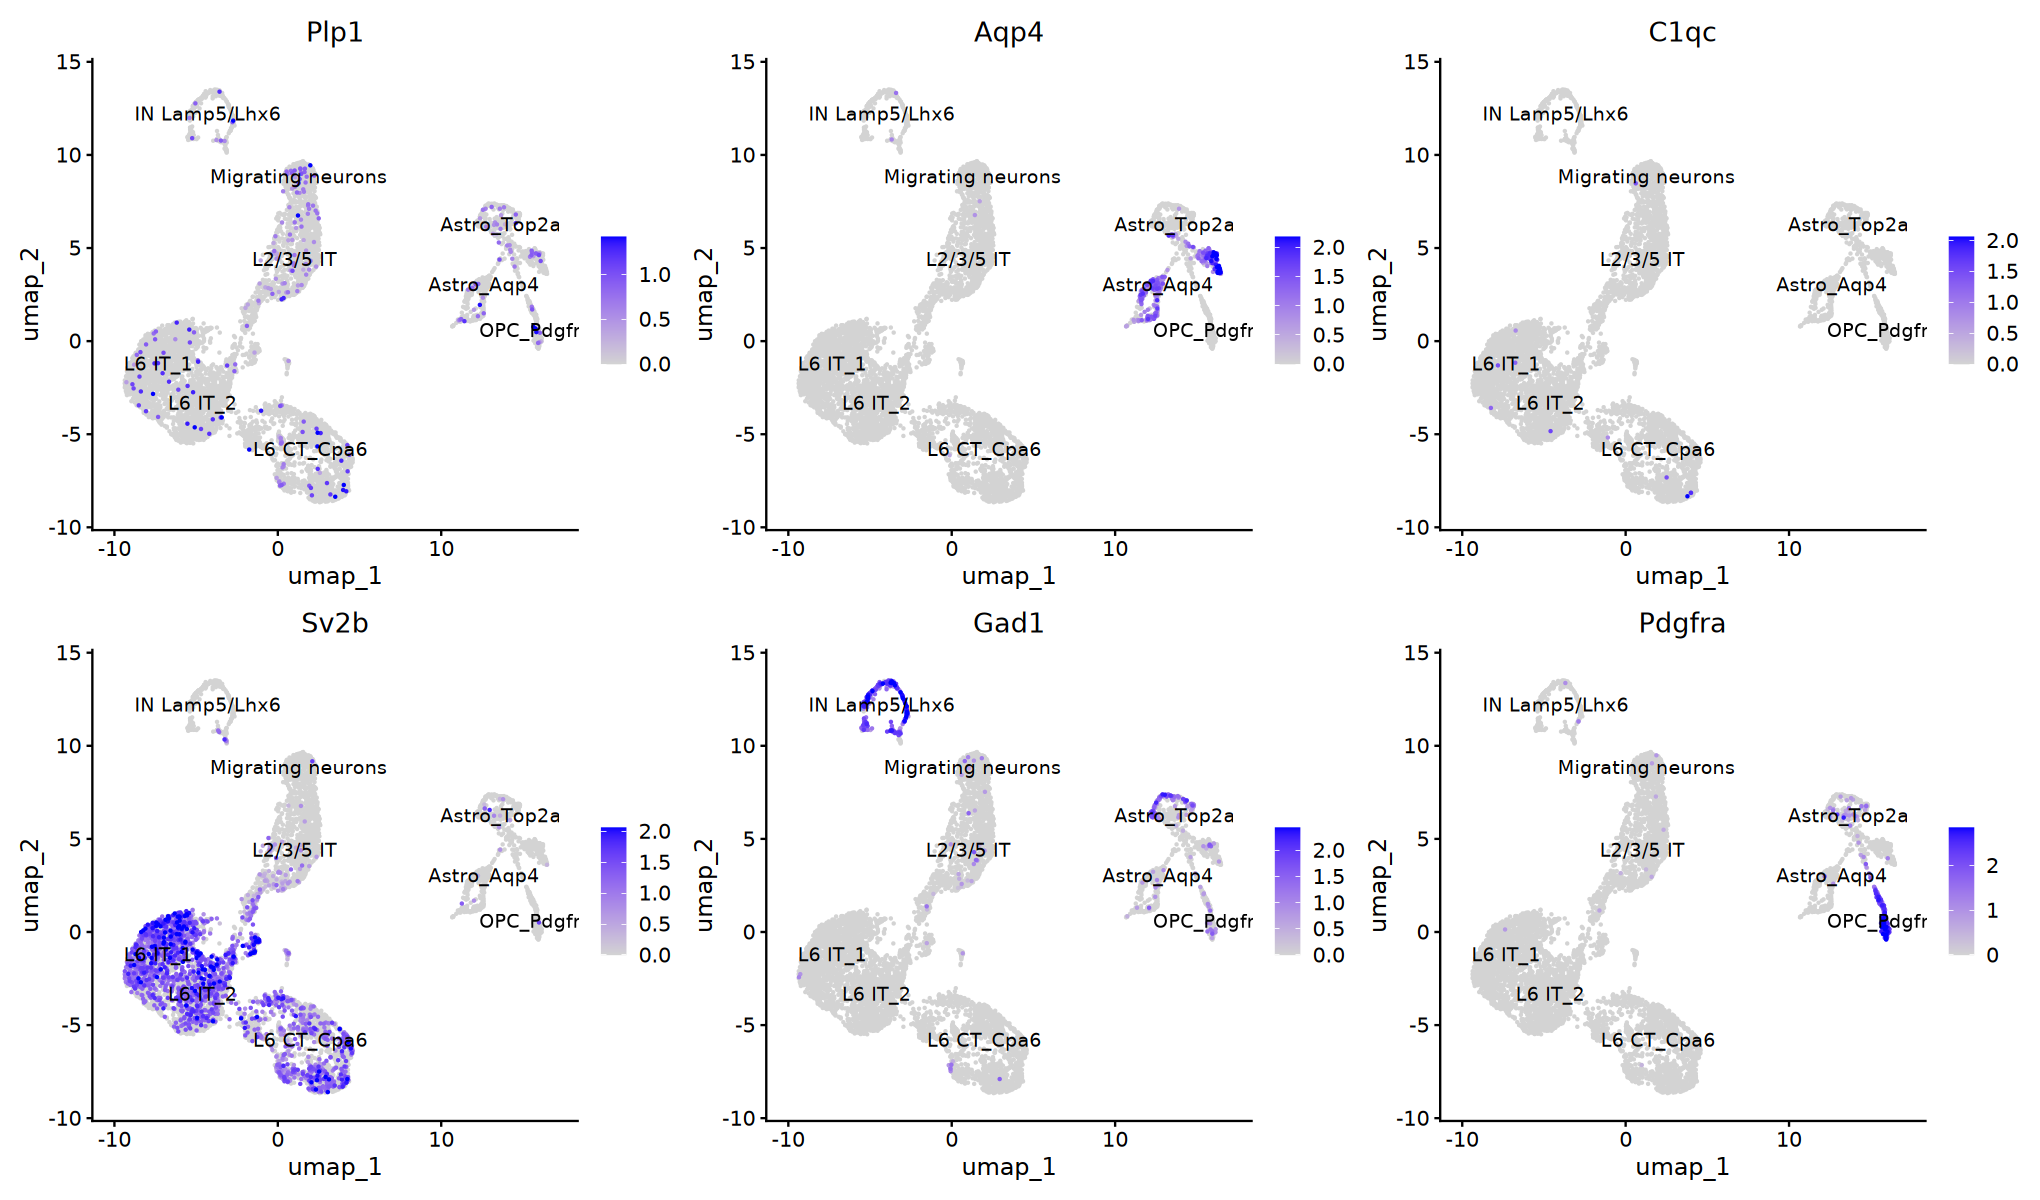

In [21]:
options(repr.plot.width=17, repr.plot.height=10)
DefaultAssay(ctx) <- "RNA"

FeaturePlot(
  object = ctx,
  features = c("Plp1",    # Oligodendrocytes
               "Aqp4",    # Astrocytes
               "C1qc",    # Microglia
               "Sv2b",    # Excitatory Neurons
               "Gad1",    # Inhibitory Neurons
               "Pdgfra"), # OPCs),
  pt.size = 0.2,
  label.size = 4,
  max.cutoff = 'q95',
  ncol = 3,
  reduction = "umap",
  label = TRUE,
  raster = FALSE,
  order = TRUE
)


# Soumya Kundu, Selin Jessa, psychENCODE project

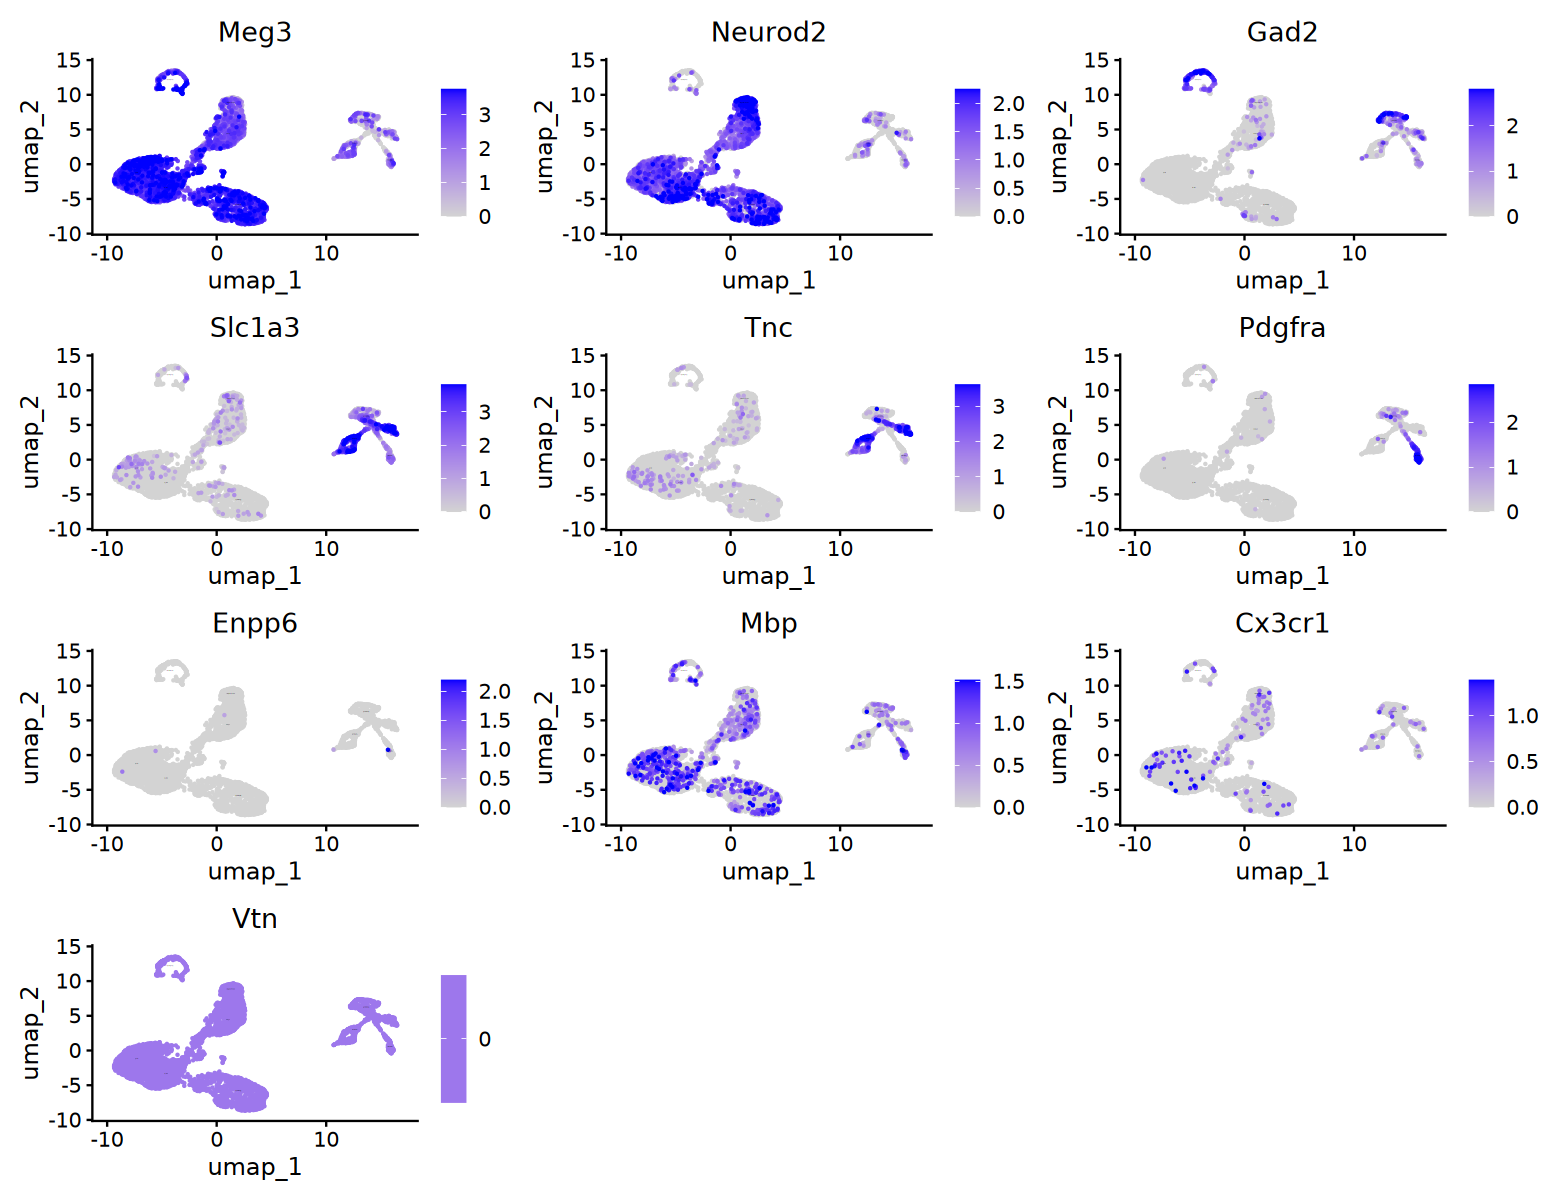

In [22]:
options(repr.plot.width=13, repr.plot.height=10)
DefaultAssay(ctx) <- "RNA"

FeaturePlot(
  object = ctx,
  features = c("Meg3",
              "Neurod2",
              "Gad2",
              "Slc1a3",
              "Tnc",
              "Pdgfra",
              "Enpp6",
              "Mbp",
              "Cx3cr1",
              "Vtn"
              ),
  pt.size = 0.2,
  label.size = 0,
  max.cutoff = 'q95',
  ncol = 3,
  reduction = "umap",
  label = TRUE,
  raster = FALSE,
  order = TRUE
)


# Tan et al., Cell (2021)
# https://www.sciencedirect.com/science/article/pii/S0092867420317542

# END